In [47]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf
import pandas as pd
from datetime import datetime as dt

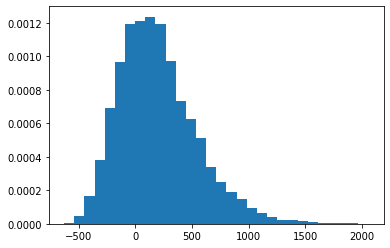

197.09190024652494


In [48]:
mu, sigma = .2, .28
days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)

n = 10_000

pl = []

for _ in range(n):
      dist = np.random.normal(daily_mu,daily_sigma,days)
      dist = dist+1
      pl.append((dist.prod()-1) * 1_000)
pl = np.array(pl)
plt.hist(pl, 30, density=True)
plt.show()
print(pl.mean())


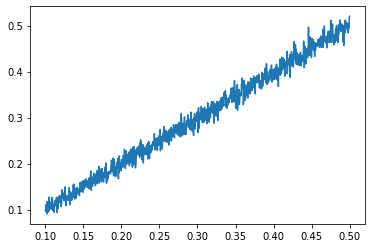

In [49]:
np.linspace(.1,.2,n)

mu, sigma = .2, .28
n = 1_000

mu_series = np.linspace(.1,.5,n)

days = 365
daily_mu_series = np.power((mu_series+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)
mu_pl = []
for mu, daily_mu in zip(mu_series,daily_mu_series):
  # print(mu)
  pl= np.array(0)
  for _ in range(n):
    dist = np.random.normal(daily_mu,daily_sigma,days)
    dist = dist+1
    pl = np.append(pl,(dist.prod()-1))
  mu_pl.append(pl.mean())

plt.plot(mu_series, mu_pl)

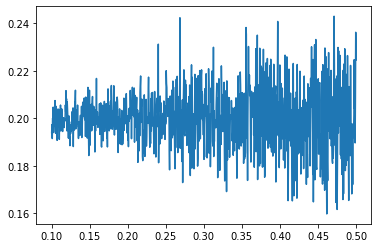

In [50]:
np.linspace(.1,.2,n)

mu, sigma = .2, .28
n = 1_000

# mu_series = np.linspace(.1,.5,n)
sigma_series = np.linspace(.1,.5,n)

days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma_series = sigma_series/np.sqrt(days)
sigma_pl = []
for sigma, daily_sigma in zip(sigma_series,daily_sigma_series):
  # print(sigma)
  pl= np.array(0)
  for _ in range(n):
    dist = np.random.normal(daily_mu,daily_sigma,days)
    dist = dist+1
    pl = np.append(pl,(dist.prod()-1))
  sigma_pl.append(pl.mean())

plt.plot(sigma_series, sigma_pl)

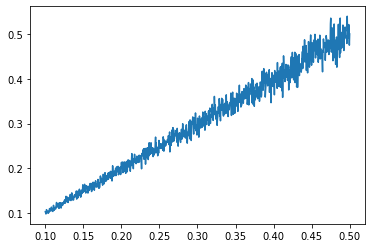

In [51]:
np.linspace(.1,.2,n)

mu, sigma = .2, .28
n = 1_000

mu_series = np.linspace(.1,.5,n)
sigma_series = np.linspace(.1,.5,n)

days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)
sigma_pl = []
for sigma in sigma_series:
#   print(sigma)
  mu = sigma
  daily_mu = np.power((mu+1),(1/days)) - 1
  daily_sigma = sigma/np.sqrt(days)
  pl= np.array(0)
  for _ in range(n):
    dist = np.random.normal(daily_mu,daily_sigma,days)
    dist = dist+1
    pl = np.append(pl,(dist.prod()-1))
  sigma_pl.append(pl.mean())

plt.plot(sigma_series, sigma_pl)

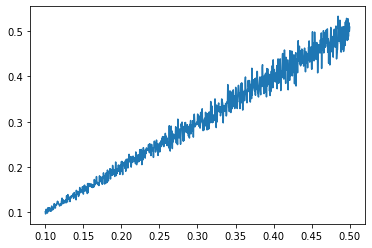

In [52]:
np.linspace(.1,.2,n)

mu, sigma = .2, .28
n = 1_000

mu_series = np.linspace(.1,.5,n)
sigma_series = np.linspace(.1,.5,n)

days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)
sigma_pl = []
for sigma in sigma_series:
#   print(sigma)
  mu = sigma
  daily_mu = np.power((mu+1),(1/days)) - 1
  daily_sigma = sigma/np.sqrt(days)
  pl= np.array(0)
  for _ in range(n):
    dist = np.random.normal(daily_mu,daily_sigma,days)
    dist = dist+1
    pl = np.append(pl,(dist.prod()-1))
  sigma_pl.append(pl.mean())

plt.plot(sigma_series, sigma_pl)

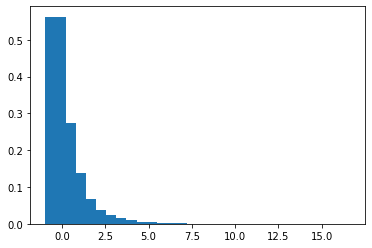

0.19241488520709163
1.0846244357008816


In [53]:
mu, sigma = .2, .8
days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)

n = 10_000

pl = []

for _ in range(n):
      dist = np.random.normal(daily_mu,daily_sigma,days)
      dist = dist+1
      pl.append(dist.prod()-1)
pl = np.array(pl)
plt.hist(pl, 30, density=True)
plt.show()
print(pl.mean())
print(pl.std())


In [54]:
pl.mean()

0.19241488520709163

In [55]:
pl.std()

1.0846244357008816

In [56]:
from scipy.stats import norm





BTC	 -> -3.904082033286538
NIFTY	 -> 19.51198974583918
Debt	 -> 19.475599487291962


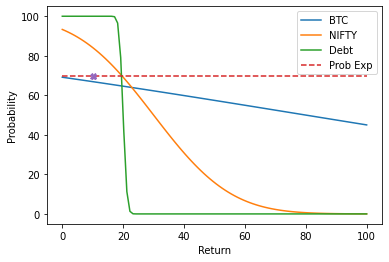

In [57]:
expected_returns = np.linspace(0,1,100)*100
goal_return = 10
goal_prob = 70
z_value = norm.ppf((100-goal_prob)/100)
instruments = [{'name':'BTC','mu':.8,'sigma':1.6,'cdf':[],'return_offered':0},
                {'name':'NIFTY','mu':.3,'sigma':.2,'cdf':[],'return_offered':0},
                {'name':'Debt','mu':.2,'sigma':.01,'cdf':[],'return_offered':0}]

for expected_return in expected_returns:
    for instrument in instruments:
        instrument['cdf'].append(round((1-norm(instrument['mu'], instrument['sigma']).cdf(expected_return/100))*100,4))
        
legends = []
for instrument in instruments:
    plt.plot(expected_returns,instrument['cdf'])
    legends.append(instrument['name'])
    instrument['return_offered'] = (instrument['mu'] + instrument['sigma']*z_value)*100
    print(f"""{instrument['name']}\t -> {instrument['return_offered']}""")

plt.plot(expected_returns,np.ones(len(expected_returns))*goal_prob,"--")
legends.append('Prob Exp')

# plt.plot(np.ones(len(expected_returns))*goal_return,np.linspace(0,100,len(expected_returns)),"--")
# legends.append('Return Exp')

plt.plot(goal_return,goal_prob,"X")


plt.legend(legends)
plt.xlabel("Return")
plt.ylabel("Probability")
plt.show()

In [58]:
instruments[0]['mu']
instruments[0]['sigma']*z_value

-0.8390408203328654

In [59]:
goal_prob = 70

z_value = norm.ppf((100-goal_prob)/100)
z_value

-0.5244005127080409

In [60]:
norm.ppf(goal_prob/100)

0.5244005127080407

In [61]:
instruments = [{'name':'NIFTY','mu':.1146,'sigma':.1733},
                {'name':'Small','mu':.16,'sigma':.3}]

In [62]:
inv = 50_000
low = 40_000
high = 100_000

t = 3

confidence = .95

rf = .1

In [63]:
pv = inv
r_low = np.power(low/inv,1/t) - 1
r_high = np.power(high/inv,1/t) - 1

pv_low = low / np.power(1+rf,t-1)
pv_high = high / np.power(1+rf,t-1)

r_fall_to_low = pv_low / inv - 1
r_jump_to_high = pv_high / inv - 1 

In [64]:
# Search for instrument with best return

best_return = -np.inf
best_return_idx = None
for i in range (len(instruments)):
    prob_of_falling_to_low = norm(instruments[i]['mu'], instruments[i]['sigma']).cdf(r_fall_to_low)    
    if (prob_of_falling_to_low < (1-confidence)) & (instruments[i]['mu']>best_return):
        best_return = instruments[i]['mu']
        best_return_idx = i
    print(f'''{instruments[i]['name']} \t {prob_of_falling_to_low}''')
    
instruments[best_return_idx]['name']

NIFTY 	 0.004441553562748352
Small 	 0.0481752454117313


'Small'

In [65]:
np.random.seed(42)
ti_return = np.random.normal(loc=instruments[best_return_idx]['mu'],scale=instruments[best_return_idx]['sigma'])
fv = pv * (1+ti_return)
print(fv)

65450.71229516849


In [66]:
def to_currency (value, multiplier=100, add_currency_symbol=True, currency_symbol = '₹',rounding=0):
    negative_sign = ""
    if value < 0:
        negative_sign = "-"
        value = abs(value)
    value = round(value,rounding)
    decimal_value = round(value%1,rounding)
    value = int(round((value-decimal_value),0))
    if decimal_value == 0:
        currency_string = "" 
    else:
        currency_string = "." + str(decimal_value)[2:]
    base = 1_000
    set = value%base
    currency_string = str(int(round(set,0))) + currency_string
    if (len(str(set)) < len(str(value))) & (len(str(set)) < len(str(base))-1):
        zeros = "".join(['0' for _ in range(len(str(base))-1-len(str(set)))])
        currency_string = zeros + currency_string
        
    converted_value = set
    if set == value:
        if add_currency_symbol:
            return currency_symbol + " " + negative_sign + currency_string
        else: 
            return negative_sign + currency_string
    else:
        while converted_value != value:
            base = base * multiplier
            set = int(round((value%base - converted_value)/base * multiplier,0))
            currency_string = str(int(set)) + "," + currency_string
            if (len(str(int(round(set*base/multiplier,0)))) < len(str(value))) & (len(str(set)) < len(str(multiplier))-1):
                zeros = "".join(['0' for _ in range(len(str(multiplier))-1-len(str(set)))])
                currency_string = zeros + currency_string
            converted_value = int(round(converted_value + (set*base/multiplier),0))

    if add_currency_symbol:
        return currency_symbol + " " + negative_sign + currency_string
    else: 
        return negative_sign + currency_string

to_currency(-78361.78264643789, multiplier=100,rounding=0, add_currency_symbol=True)

'₹ -78,362'

In [67]:
instruments = [{'name':'NIFTY','mu':.1146,'sigma':.1733},
                {'name':'Risk Free','mu':.06,'sigma':.000000001}]

verbose = 1

inv = 100_000
low = 180_000

t = 10
confidence = .95
rf = instruments[-1]['mu']
pv_low = npf.pv(rf,t,pmt=0,fv=-low)

if pv_low > inv:
    print("Please take more risk to achieve this goal")
else:
    np.random.seed(43)

    pv = inv

    for ti in range(1,t+1):
        if verbose == 2:
            print(f"""Year - {ti}""")
        pv_low = npf.pv(rf,t-ti+1,pmt=0,fv=-low)
        # pv_low = low / np.power(1+rf,t-ti+1)
        r_fall_to_low = pv_low / pv - 1
        if verbose == 2:
            print(f"""\tPV = {to_currency(pv)}\n\tPV Low ({t-ti+1} years to go) = {to_currency(pv_low)}\n\tSearching for best Instrument""")

        best_return = -np.inf
        best_return_idx = None
        found_best_instrument = False
        for i in range (len(instruments)):
            prob_of_falling_to_low = norm(instruments[i]['mu'], instruments[i]['sigma']).cdf(r_fall_to_low)   
            if (prob_of_falling_to_low < (1-confidence)) & (instruments[i]['mu']>best_return):
                best_return = instruments[i]['mu']
                best_return_idx = i
            if verbose == 2:
                print(f'''\t\t{instruments[i]['name']} \t {round(prob_of_falling_to_low*100,2)}%''')
            
        if verbose == 2:
            print(f'''\t\tSelected Instrument: {instruments[best_return_idx]['name']}''')

        ti_return = np.random.normal(loc=instruments[best_return_idx]['mu'],scale=instruments[best_return_idx]['sigma'])
        fv = pv * (1+ti_return)
        if verbose == 2:
            print(f'''\tReturn in Year {ti}: {round(ti_return*100,2)}%\n\tFV = {to_currency(fv)}''')
        elif verbose == 1:
            print(f"""Year - {ti}\t {to_currency(pv)} in {instruments[best_return_idx]['name']} @ {round(ti_return*100,2)}% \t-> {to_currency(fv)}""")

        pv = fv
        



Please take more risk to achieve this goal


In [68]:
instruments = [{'name':'NIFTY','mu':.1146,'sigma':.1733},
                {'name':'Risk Free','mu':.06,'sigma':.000000001}]

instruments = pd.DataFrame(instruments)
np.random.seed(43)


verbose = 1

downpayment = 100_000
emi = 70_000
low = 150_000
iterations_per_year = 12
payment_in_each_year = 2

confidence = .95
total_years = 1
t = total_years * iterations_per_year
payment_in_n_iterations = int(iterations_per_year / payment_in_each_year)

cashflows = np.zeros(t)
cashflows = np.insert(cashflows,0,downpayment)

cashflows[[i for i in range(payment_in_n_iterations,t,payment_in_n_iterations)]]  = emi


instruments['mu_iter'] = np.power(1+instruments['mu'],1/iterations_per_year) - 1
instruments['sigma_iter'] = instruments['sigma'] / np.sqrt(iterations_per_year)
rf = instruments['mu_iter'].iloc[-1]
inv = npf.npv(rf,cashflows)
pv_low = npf.pv(rf,t,pmt=0,fv=-low)

if pv_low > inv:
    print("Please take more risk to achieve this goal")
else:
    np.random.seed(43)

    pv = 0

    for ti in range(0,t):
        tplus_pv_future_cashflows = npf.npv(rf,cashflows[ti+1:])
        tplus_pv_low = npf.pv(rf,t-ti+1,pmt=0,fv=-low)
        safe_tplus_pv = tplus_pv_low - tplus_pv_future_cashflows
        
        if verbose == 2:
            print(f"""Iter - {ti}""")
            print(f"""\tPV = {to_currency(pv)} + {to_currency(cashflows[ti])} = {to_currency(pv + cashflows[ti])}\n\tSafe PV Low ({t-ti} iters to go) = {to_currency(safe_tplus_pv)}\n\tSearching for best Instrument""")

        pv = pv + cashflows[ti]
        r_fall_to_low = safe_tplus_pv / pv - 1
        best_return = -np.inf
        best_return_instrument = None
        found_best_instrument = False
        for idx, instrument in instruments.iterrows():
            prob_of_falling_to_low = norm(instrument['mu_iter'], instrument['sigma_iter']).cdf(r_fall_to_low)   
            if (prob_of_falling_to_low < (1-confidence)) & (instrument['mu_iter']>best_return):
                best_return = instrument['mu_iter']
                best_return_instrument = instrument.copy()
            if verbose == 2:
                print(f'''\t\t{instrument['name']} \t {round(prob_of_falling_to_low*100,2)}%''')
            
        if verbose == 2:
            print(f'''\t\tSelected Instrument: {best_return_instrument['name']}''')

        ti_return = np.random.normal(loc=best_return_instrument['mu_iter'],scale=best_return_instrument['sigma_iter'])
        fv = pv * (1+ti_return)
        if verbose == 2:
            print(f'''\tReturn in iter {ti}: {round(ti_return*100,2)}% = {to_currency(pv * ti_return)}\n\tFV = {to_currency(pv)} + {to_currency(pv * ti_return)} = {to_currency(fv)}''')
        elif verbose == 1:
            print(f"""Iter - {ti}\t {to_currency(pv-cashflows[ti])} + {to_currency(cashflows[ti])} \t in {best_return_instrument['name']} @ {round(ti_return*100,2)}% \t-> {to_currency(fv)}""")

        pv = fv

print(f'''Portfolio of {to_currency(pv)}, compared to low of {to_currency(low)} and  {to_currency(npf.fv(rf,t,pmt=0,pv=-inv))} by fixed return''')
        



Iter - 0	 ₹ 0 + ₹ 1,00,000 	 in NIFTY @ 2.2% 	-> ₹ 1,02,196
Iter - 1	 ₹ 1,02,196 + ₹ 0 	 in NIFTY @ -3.64% 	-> ₹ 98,479
Iter - 2	 ₹ 98,479 + ₹ 0 	 in NIFTY @ -0.99% 	-> ₹ 97,509
Iter - 3	 ₹ 97,509 + ₹ 0 	 in NIFTY @ -1.77% 	-> ₹ 95,785
Iter - 4	 ₹ 95,785 + ₹ 0 	 in NIFTY @ 5.2% 	-> ₹ 1,00,767
Iter - 5	 ₹ 1,00,767 + ₹ 0 	 in NIFTY @ -1.16% 	-> ₹ 99,600
Iter - 6	 ₹ 99,600 + ₹ 70,000 	 in NIFTY @ 3.4% 	-> ₹ 1,75,368
Iter - 7	 ₹ 1,75,368 + ₹ 0 	 in NIFTY @ 10.96% 	-> ₹ 1,94,596
Iter - 8	 ₹ 1,94,596 + ₹ 0 	 in NIFTY @ 7.23% 	-> ₹ 2,08,658
Iter - 9	 ₹ 2,08,658 + ₹ 0 	 in NIFTY @ -1.29% 	-> ₹ 2,05,968
Iter - 10	 ₹ 2,05,968 + ₹ 0 	 in NIFTY @ -0.82% 	-> ₹ 2,04,269
Iter - 11	 ₹ 2,04,269 + ₹ 0 	 in NIFTY @ 3.19% 	-> ₹ 2,10,777
Portfolio of ₹ 2,10,777, compared to low of ₹ 1,50,000 and  ₹ 1,78,069 by fixed return


In [109]:
def get_return(current_date, instrument):
    try:
        change = instrument['df'][instrument['df']['Date']==current_date]['change'].iloc[-1]
        return change
    except:
        return None

In [108]:
fall = .00035

def get_fall_prob (fall, dist_df, lookback_years = None, current_date = None):
    if (lookback_years is not None)  & (current_date is not None):
        start_date = dt(current_date.year-lookback_years, current_date.month, current_date.day)
        dist_df = dist_df[(dist_df['Date']>= start_date) & (dist_df['Date']<=current_date)] 
    dist_prob = dist_df[dist_df['change']<=fall].shape[0] / dist_df.shape[0]
    norm_prob = norm(dist_df['change'].mean(), dist_df['change'].std()).cdf(fall)
    return dist_prob if dist_prob > norm_prob else norm_prob

def get_mean_return (dist_df, lookback_years = None, current_date = None):
    if (lookback_years is not None)  & (current_date is not None):
        start_date = dt(current_date.year-lookback_years, current_date.month, current_date.day)
        dist_df = dist_df[(dist_df['Date']>= start_date) & (dist_df['Date']<=current_date)]
    return dist_df['change'].mean()

get_mean_return(instrument['df'],lookback_years=6, current_date=dt(2022,1,1))

0.0003676970978927862

In [203]:
instruments = [{'name':'NIFTY','filename':'NIFTY50_Data.csv'},
                {'name':'NIFTY High Beta','filename':'NIFTY HIGH BETA 50_Data.csv'}]

for instrument in instruments:
    instrument['df'] = pd.read_csv(instrument['filename'])
    instrument['df']['Date'] = pd.to_datetime(instrument['df']['Date'])
    instrument['df'].sort_values(by='Date', inplace=True)
    instrument['df']['change'] = (instrument['df']['Close'] - instrument['df']['Close'].shift(periods=1)) / instrument['df']['Close'].shift(periods=1)
    print(f'''{instrument['name']}\t mu = {round(instrument['df']['change'].mean()*100,2)}%\t sigma = {round(instrument['df']['change'].std()*100,2)}%''')

np.random.seed(43)


verbose = 2

goal_inception_date = dt(2020,6,1)
goal_maturity_date = dt(2021,8,11)
lookback_years = 10

downpayment = 100_000
emi = 70_000
low = 220_000

total_payments = 2
confidence = .95

rf_annual = .06


t = (goal_maturity_date - goal_inception_date).days + 1
payment_in_n_iterations = int(iterations_per_year / payment_in_each_year)


all_dates = pd.date_range(start=goal_inception_date, end=goal_maturity_date)
total_payments = 2
payment_dates = pd.date_range(start=goal_inception_date, end=goal_maturity_date, periods=total_payments+1, normalize=True)[1:]

cashflows = pd.DataFrame(index=all_dates)
cashflows.reset_index(inplace=True)
cashflows['date'] = cashflows['index'].dt.date
cashflows['cashflow'] = 0
cashflows.loc[cashflows.index[0],'cashflow'] = downpayment

payments = pd.DataFrame(index=payment_dates)
payments.reset_index(inplace=True)
payments['date'] = payments['index'].dt.date
payments['payment'] = emi

cashflows = cashflows[['date','cashflow']].merge(right=payments[['date','payment']], how='left', on='date')
cashflows.fillna(0, inplace=True)

cashflows['date'] = pd.to_datetime(cashflows['date'])

cashflows['cashflow'] = cashflows['cashflow'] + cashflows['payment']

cashflows.drop('payment',axis=1, inplace=True)

rf = np.power(rf_annual+1,1/365) - 1

invested_in_rf = False

inv = npf.npv(rf,cashflows['cashflow'])

pv_low = npf.pv(rf,t,pmt=0,fv=-low)

if pv_low > inv:
    print("Please take more risk to achieve this goal")
else:
    pv = 0

    for ti, day in cashflows.iterrows():
        if day['date'] not in instruments[0]['df']['Date'].values:
            if invested_in_rf:
                ti_return = rf
            else:
                ti_return = 0
        else:
            tplus1_pv_future_cashflows = npf.npv(rf,cashflows[ti+1:]['cashflow'])
            tplus1_pv_low = npf.pv(rf,t-ti+1,pmt=0,fv=-low)
            safe_tplus1_pv = tplus1_pv_low - tplus1_pv_future_cashflows
            
            if verbose == 2:
                print(f"""Day {ti} -> {day['date'].strftime("%-d %b %y, %a")}""")
                print(f"""\tPV = {to_currency(pv)} + {to_currency(day['cashflow'])} = {to_currency(pv + day['cashflow'])}\n\tSafe PV Low ({t-ti} days to go) = {to_currency(safe_tplus1_pv)}\n\tSearching for best Instrument""")

            pv = pv + day['cashflow']
            r_fall_to_low = safe_tplus1_pv / pv - 1
            best_return = -np.inf
            best_return_instrument = None
            found_best_instrument = False
            for instrument in instruments:
                prob_of_falling_to_low = get_fall_prob(r_fall_to_low,instrument['df'], current_date=day['date'], lookback_years=lookback_years)
                if (prob_of_falling_to_low < (1-confidence)):
                    mean_return = get_mean_return(instrument['df'], current_date=day['date'], lookback_years=lookback_years)
                    if (mean_return)>best_return:
                        best_return = mean_return
                        best_return_instrument = instrument.copy()
                if verbose == 2:
                    print(f'''\t\t{instrument['name']} \t {round(prob_of_falling_to_low*100,2)}%''')

            if best_return_instrument is not None:  
                if verbose == 2:
                    print(f'''\t\tSelected Instrument: {best_return_instrument['name']}''')

                ti_return = get_return(current_date=day['date'], instrument=best_return_instrument)
                invested_in_rf = False
            else:
                if verbose == 2:
                    print(f'''\t\tSelected Instrument: Risk Free''')
                ti_return = rf
                invested_in_rf = True
        fv = pv * (1+ti_return)
        if verbose == 2:
            print(f'''\tReturn on {day['date'].strftime("%-d %b %y")}: {round(ti_return*100,2)}% = {to_currency(pv * ti_return)}\n\tFV = {to_currency(pv)} + {to_currency(pv * ti_return)} = {to_currency(fv)}''')
        elif verbose == 1:
            print(f"""{day['date'].strftime("%-d %b %y, %a")}\t {to_currency(pv-day['cashflow'])} + {to_currency(day['cashflow'])} \t in {best_return_instrument['name']} @ {round(ti_return*100,2)}% \t-> {to_currency(fv)}""")

        pv = fv

print(f'''Portfolio of {to_currency(pv)}, compared to low of {to_currency(low)} and  {to_currency(npf.fv(rf,t,pmt=0,pv=-inv))} by fixed return''')
        



NIFTY	 mu = 0.05%	 sigma = 1.43%
NIFTY High Beta	 mu = 0.04%	 sigma = 2.14%
Day 0 -> 1 Jun 20, Mon
	PV = ₹ 0 + ₹ 1,00,000 = ₹ 1,00,000
	Safe PV Low (437 days to go) = ₹ 72,222
	Searching for best Instrument
		NIFTY 	 0.0%
		NIFTY High Beta 	 0.0%
		Selected Instrument: NIFTY
	Return on 1 Jun 20: 2.57% = ₹ 2,566
	FV = ₹ 1,00,000 + ₹ 2,566 = ₹ 1,02,566
Day 1 -> 2 Jun 20, Tue
	PV = ₹ 1,02,566 + ₹ 0 = ₹ 1,02,566
	Safe PV Low (436 days to go) = ₹ 72,234
	Searching for best Instrument
		NIFTY 	 0.0%
		NIFTY High Beta 	 0.0%
		Selected Instrument: NIFTY
	Return on 2 Jun 20: 1.56% = ₹ 1,597
	FV = ₹ 1,02,566 + ₹ 1,597 = ₹ 1,04,163
Day 2 -> 3 Jun 20, Wed
	PV = ₹ 1,04,163 + ₹ 0 = ₹ 1,04,163
	Safe PV Low (435 days to go) = ₹ 72,245
	Searching for best Instrument
		NIFTY 	 0.0%
		NIFTY High Beta 	 0.0%
		Selected Instrument: NIFTY
	Return on 3 Jun 20: 0.83% = ₹ 861
	FV = ₹ 1,04,163 + ₹ 861 = ₹ 1,05,023
Day 3 -> 4 Jun 20, Thu
	PV = ₹ 1,05,023 + ₹ 0 = ₹ 1,05,023
	Safe PV Low (434 days to go) = ₹ 72,2

In [187]:
cashflows['cashflow'].sum()

240000.0

In [153]:
if day['date'] not in instruments[0]['df']['Date']:
    print("No")

No


In [168]:
for ti, day in cashflows.iterrows():
    if day['date'] in instruments[0]['df']['Date']:
        print(day['date'])
# d = cashflows['date'].iloc[4]
# d in 

In [176]:
day['date']
k in instruments[0]['df']['Date'].values

True

In [47]:
fall = .0004

def get_change_prob (change, instrument, get_higher_prob = True):
    dist_prob = df[df['change']<=fall].shape[0] / df.shape[0]
    norm_prob = norm(df['change'].mean(), df['change'].std()).cdf(fall)

    if get_higher_prob:
        return dist_prob if dist_prob > norm_prob else norm_prob 

get_change_prob

0.46054713995026003 0.5004829700161322


'11 May 22'

In [72]:
current_date = d
lookback_years = 10





start_date

datetime.datetime(2012, 5, 8, 0, 0)

In [80]:
dist_df = df
print(dist_df.shape)

print(dist_df.shape)

(4423, 6)
(2339, 6)


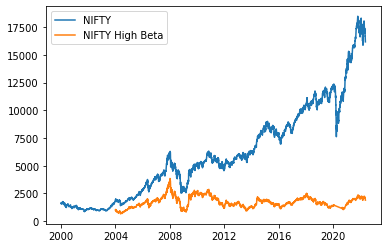

In [202]:
for instrument in instruments:
    plt.plot(instrument['df']['Date'], instrument['df']['Close'],label=instrument['name'])
plt.legend()
plt.show()